In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_df = pd.read_csv('dataset/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [4]:
test_df = pd.read_csv('dataset/test.csv')
test_df.shape

(3263, 4)

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df['keyword'].fillna('No_Keyword', inplace=True)
train_df['location'].fillna('No_location', inplace=True)
train_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Our Deeds are the Reason of this #earthquake M...,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask. Canada,1
2,5,No_Keyword,No_location,All residents asked to 'shelter in place' are ...,1
3,6,No_Keyword,No_location,"13,000 people receive #wildfires evacuation or...",1
4,7,No_Keyword,No_location,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
import nltk
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#Data Cleaning
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove emojis
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

In [9]:
train_df['text'] = train_df.loc[:,'text'].apply(preprocess_text)
train_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask Canada,1
2,5,No_Keyword,No_location,residents asked shelter place notified officer...,1
3,6,No_Keyword,No_location,13000 people receive wildfires evacuation orde...,1
4,7,No_Keyword,No_location,got sent photo Ruby Alaska smoke wildfires pou...,1


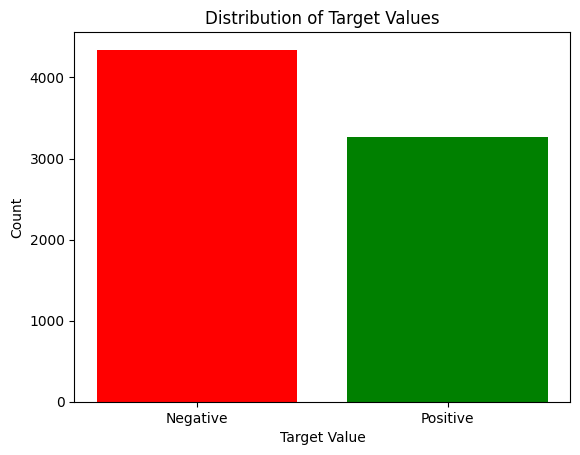

In [10]:
# Count the occurrences of each target value
target_counts = train_df['target'].value_counts()

#Plot the bar chart
plt.bar(target_counts.index, target_counts.values, color=['red', 'green'])
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Target Values')
plt.xticks(target_counts.index, ['Negative', 'Positive'])
plt.show()

In [11]:
train_df['location'] = train_df.loc[:,'location'].apply(preprocess_text)
train_df['keyword'] = train_df.loc[:,'keyword'].apply(preprocess_text)

In [12]:
# Count the occurrences of each location name
location_counts = train_df['location'].value_counts()
location_counts

No_location                 2533
USA                          109
New York                      73
                              62
United States                 50
                            ... 
Surulere LagosHome Swagg       1
MontrÌal QuÌbec                1
Montreal                       1
ÌÏT 64682318287                1
Lincoln                        1
Name: location, Length: 3132, dtype: int64

In [13]:
# Count the occurrences of each keyword name
location_counts = train_df['keyword'].value_counts()
location_counts

No_Keyword              61
fatalities              45
deluge                  42
armageddon              42
sinking                 41
                        ..
forest20fire            19
epicentre               12
threat                  11
inundation              10
radiation20emergency     9
Name: keyword, Length: 222, dtype: int64

In [14]:
# Separate the data into positive and negative labels
positive_df = train_df[train_df['target'] == 1]
negative_df = train_df[train_df['target'] == 0]

positive_df.head()

,id,keyword,location,text,target
0,1,No_Keyword,No_location,Deeds Reason earthquake May ALLAH Forgive us,1
1,4,No_Keyword,No_location,Forest fire near La Ronge Sask Canada,1
2,5,No_Keyword,No_location,residents asked shelter place notified officer...,1
3,6,No_Keyword,No_location,13000 people receive wildfires evacuation orde...,1
4,7,No_Keyword,No_location,got sent photo Ruby Alaska smoke wildfires pou...,1


In [15]:
#Plot 10 ten location and keyword
top_positive_locations = positive_df[(positive_df['location'] != 'No_location')]['location'].value_counts().head(10)
top_negative_locations = negative_df[(negative_df['location'] != 'No_location')]['location'].value_counts().head(10)

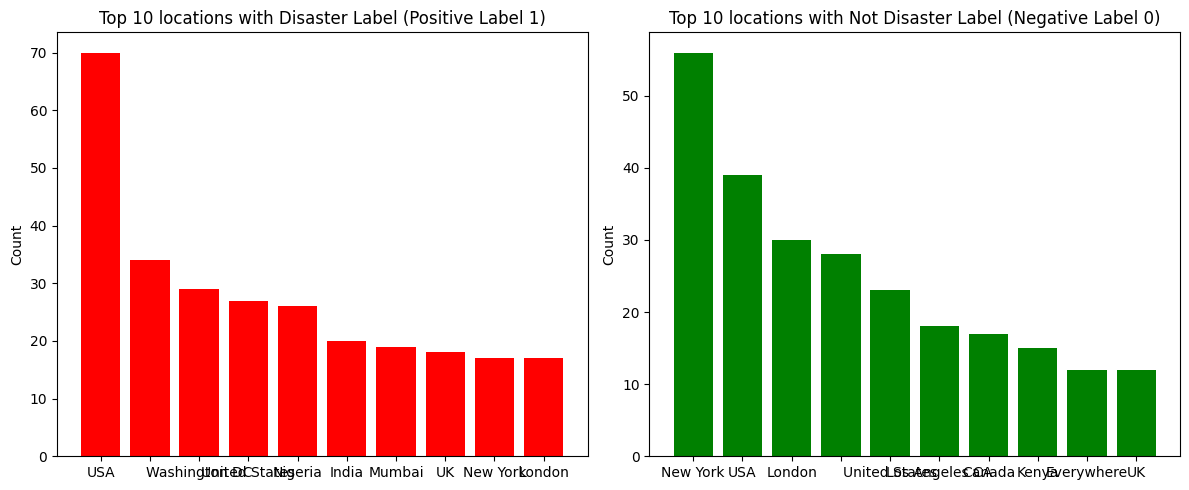

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Top 10 positive location
axes[0].bar(top_positive_locations.index, top_positive_locations.values, color='red')
axes[0].set_title('Top 10 locations with Disaster Label (Positive Label 1)')
axes[0].set_ylabel('Count')

# Top 10 negative location
axes[1].bar(top_negative_locations.index, top_negative_locations.values, color='green')
axes[1].set_title('Top 10 locations with Not Disaster Label (Negative Label 0)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
#Cloud word with keyword
from wordcloud import WordCloud

disaster_keywords = ' '.join(positive_df[(positive_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))
no_disaster_keywords = ' '.join(negative_df[(negative_df['keyword'] != 'No_Keyword')]['keyword'].astype(str))


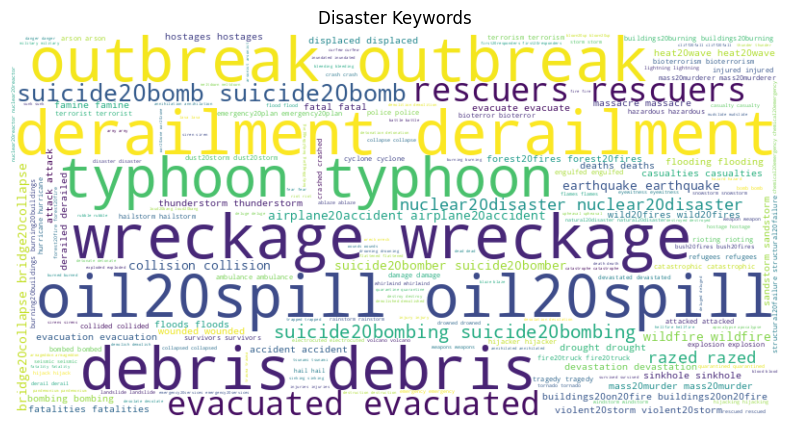

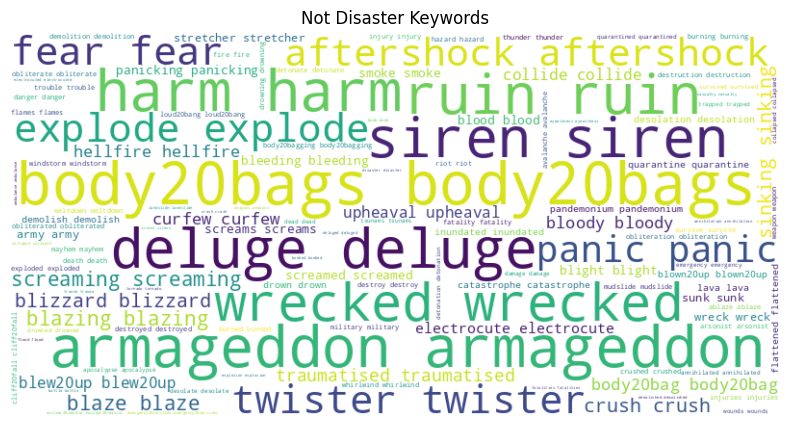

In [18]:
# Generate the word cloud
def generate_word_cloud(data,title):

    wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(data)

    # Display the generated word cloud using Matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(disaster_keywords,"Disaster Keywords")
generate_word_cloud(no_disaster_keywords,"Not Disaster Keywords")

In [19]:
#Use bag of word to show common words in post text
from sklearn.feature_extraction.text import CountVectorizer

positive_data = positive_df['text']
negative_data = negative_df['text']

In [20]:
# Function to get top words
def get_top_words(text_data, top_n=10):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_counts))
    sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return dict(sorted_word_freq[:top_n])

In [21]:
# Get top words for each label
top_positive_words = get_top_words(positive_data)
top_negative_words = get_top_words(negative_data)

top_negative_words

{'like': 253,
 'im': 243,
 'amp': 192,
 'new': 168,
 'get': 163,
 'dont': 141,
 'one': 127,
 'body': 112,
 'via': 99,
 'would': 97}

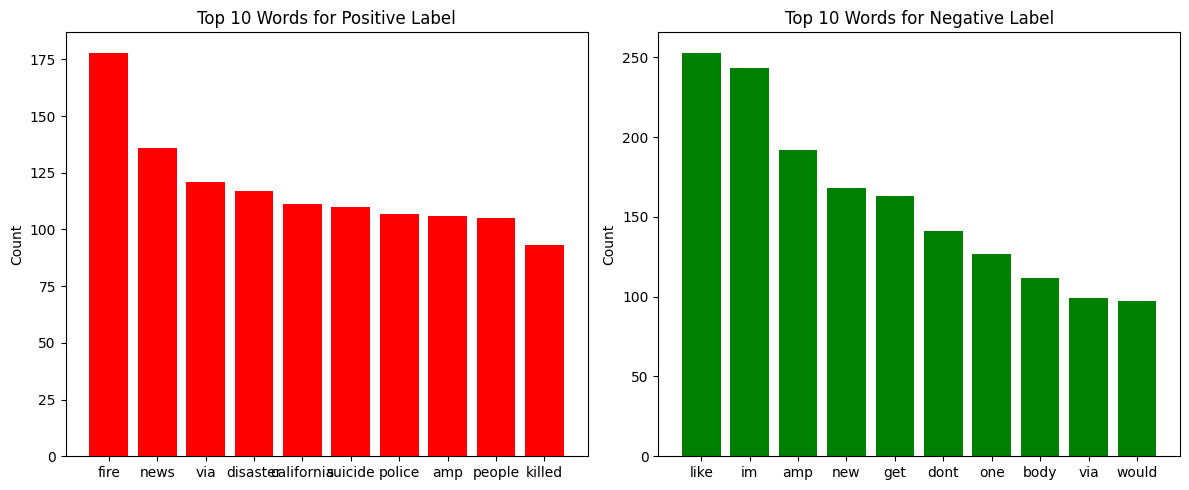

In [37]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Positive label
axes[0].bar(top_positive_words.keys(), top_positive_words.values(), color='red')
axes[0].set_title('Top 10 Words for Positive Label')
axes[0].set_ylabel('Count')

# Negative label
axes[1].bar(top_negative_words.keys(), top_negative_words.values(), color='green')
axes[1].set_title('Top 10 Words for Negative Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

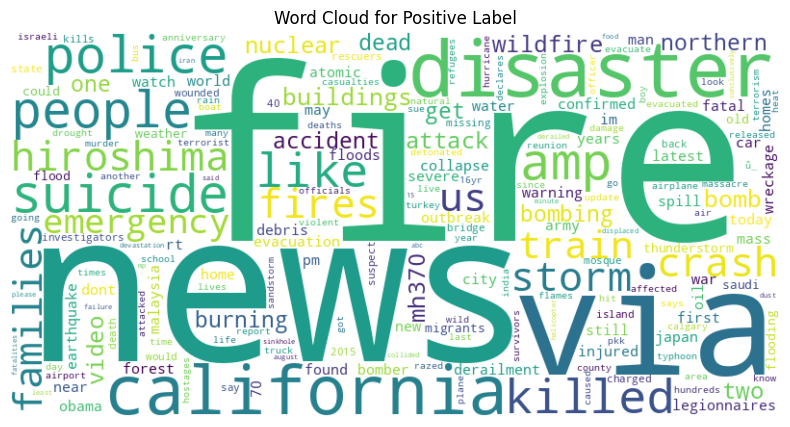

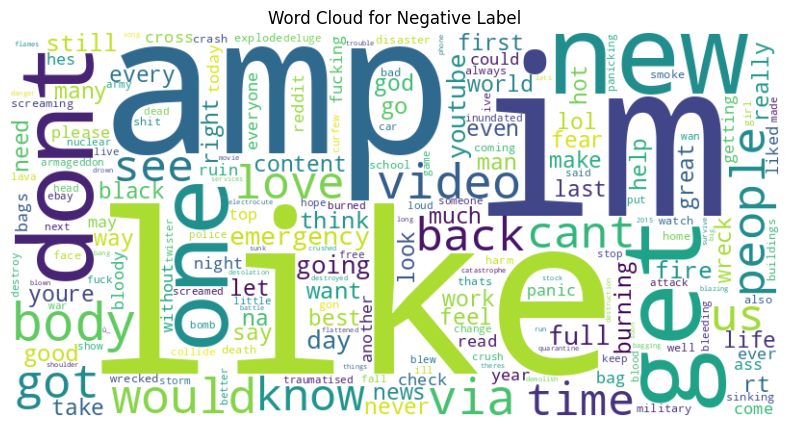

In [23]:
# Function to get word cloud
def generate_word_cloud(text_data, title):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    word_counts = X.sum(axis=0).A1
    word_freq = dict(zip(words, word_counts))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for each label
generate_word_cloud(train_df[train_df['target'] == 1]['text'], 'Word Cloud for Positive Label')
generate_word_cloud(train_df[train_df['target'] == 0]['text'], 'Word Cloud for Negative Label')


In [24]:
#pip install wordcloud

In [25]:
#Baseline Models
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Train Test Split

In [26]:
#Split Data
# train_data, eval_data, train_labels, eval_labels = train_test_split(x_data.values, Y.values, test_size=0.3, random_state=7)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['target'], test_size=0.2, random_state=42)

#Logistic Regression

In [27]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build a logistic regression model
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Make predictions
lr_predictions = lr_classifier.predict(X_test_tfidf)



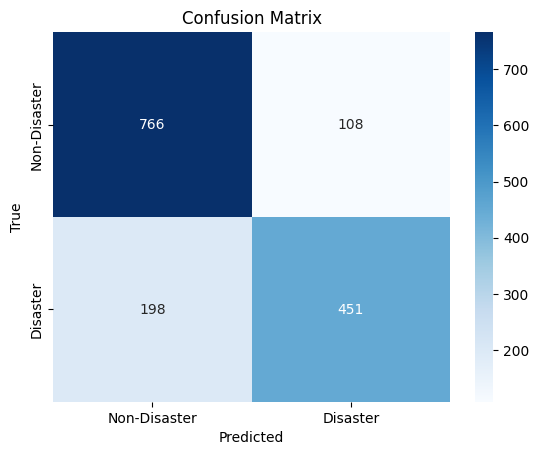


Accuracy: 0.799080761654629
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [28]:
# Generate and print the confusion matrix

def eval_matrix(eval_labels, predictions):

  conf_matrix = confusion_matrix(eval_labels, predictions)

  # Plot the confusion matrix
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  # Evaluate the model
  accuracy = accuracy_score(eval_labels, predictions)
  report = classification_report(eval_labels, predictions)

  print(f"\nAccuracy: {accuracy}")
  print("Classification Report:")
  print(report)

#LR
eval_matrix(y_test, lr_predictions)

#Naive Bayes

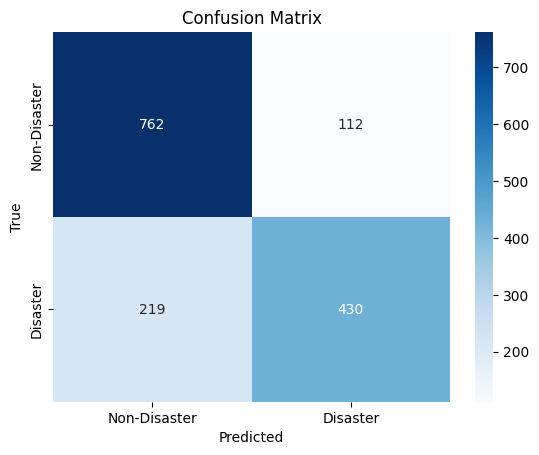


Accuracy: 0.7826657912015759
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.66      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [29]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
nb_predict = naive_bayes_model.predict(X_test_tfidf)

#Naive Bayes
eval_matrix(y_test, nb_predict)

#Support Vector Machines

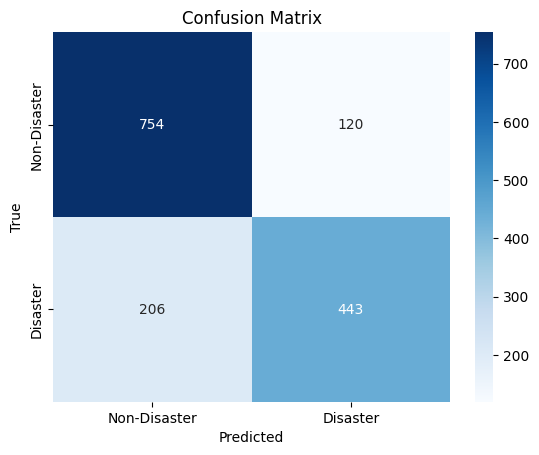


Accuracy: 0.7859487852921865
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [30]:
from sklearn.svm import SVC

# Initialize and train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_pridict = svm_model.predict(X_test_tfidf)

#Plot
eval_matrix(y_test, svm_pridict)

#LSTM

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

# Tokenize and pad the sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100  # Set the maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

# Make predictions on the test set
y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/5
191/191 [==============================] - 30s 145ms/step - loss: 0.5280 - accuracy: 0.7287 - val_loss: 0.4494 - val_accuracy: 0.7938
Epoch 2/5
191/191 [==============================] - 27s 144ms/step - loss: 0.3317 - accuracy: 0.8608 - val_loss: 0.4717 - val_accuracy: 0.7859
Epoch 3/5
191/191 [==============================] - 27s 144ms/step - loss: 0.2411 - accuracy: 0.9016 - val_loss: 0.5508 - val_accuracy: 0.7741
Epoch 4/5
191/191 [==============================] - 30s 156ms/step - loss: 0.1787 - accuracy: 0.9323 - val_loss: 0.6635 - val_accuracy: 0.7498
Epoch 5/5
48/48 [==============================] - 4s 63ms/step


In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       874
           1       0.70      0.69      0.70       649

    accuracy                           0.74      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.74      0.74      0.74      1523



#Compare all models

### 1. Logistic Regression



              precision    recall  f1-score   support

           0       0.79      0.88      0.83       874
           1       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



### 2. Naive Bayes


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.66      0.72       649

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



### 3. SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.68      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523   



### 4. LSTM

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       874
           1       0.70      0.69      0.70       649

    accuracy                           0.74      1523
   macro avg       0.74      0.74      0.74      1523
weighted avg       0.74      0.74      0.74      1523

In [33]:
#Test with Test Data

test_data = test_df['text']

# Vectorize the new data using the same TF-IDF vectorizer
X_new = vectorizer.transform(test_data)

# Make predictions using the trained model Logistic Regression
new_predictions = lr_classifier.predict(X_new)

# Create a new DataFrame with the results
results_data = {'Text': test_data, 'Prediction': ['Disaster' if prediction == 1 else 'Non-Disaster' for prediction in new_predictions]}
results_df = pd.DataFrame(results_data)
results_df

,Text,Prediction
0,Just happened a terrible car crash,Disaster
1,"Heard about #earthquake is different cities, s...",Disaster
2,"there is a forest fire at spot pond, geese are...",Disaster
3,Apocalypse lighting. #Spokane #wildfires,Non-Disaster
4,Typhoon Soudelor kills 28 in China and Taiwan,Disaster
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,Disaster
3259,Storm in RI worse than last hurricane. My city...,Disaster
3260,Green Line derailment in Chicago http://t.co/U...,Disaster
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,Disaster


In [34]:
ids = range(0, len(new_predictions))
submission_df = pd.DataFrame({'id': ids, 'target': new_predictions})
submission_df

,id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
3258,3258,1
3259,3259,1
3260,3260,1
3261,3261,1


In [35]:
submission_df.to_csv('dataset/submission.csv', index=False)